# Classification 1: Tabluar data


Credits: https://github.com/Apaulgithub/oibsip_taskno1/blob/main/Iris_Flower_Classification.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics, datasets, decomposition, preprocessing
sns.set()

In [5]:
iris = datasets.load_iris(as_frame=True)
iris_data = iris["data"]
iris_data["species"] = [iris["target_names"][sp] for sp in iris["target"]]
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Missing Values/Null Values Count
missing_vals = iris_data.isnull().sum()
print(f"{missing_vals} missing values")

# Dataset Duplicate Value Count
dup = iris_data.duplicated().sum()
print(f'number of duplicated rows are {dup}')


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64 missing values
number of duplicated rows are 1


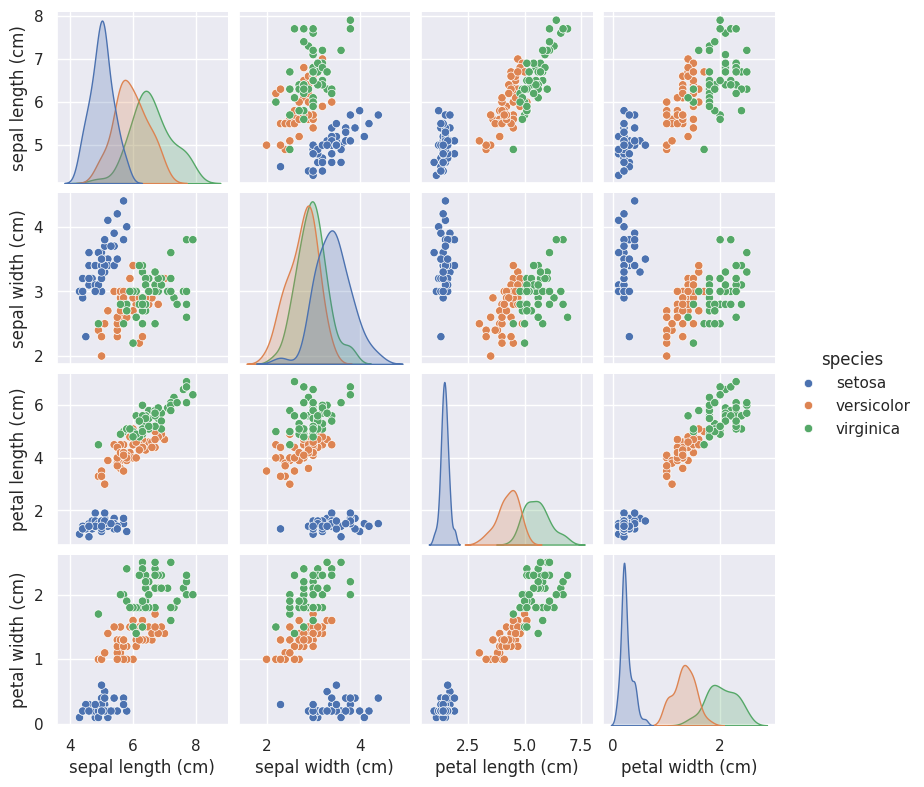

In [4]:
sns.pairplot(iris_data, hue="species", height=2)

In [ ]:
iris_data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder

# Encode the categorical columns
# Create a LabelEncoder object
le = LabelEncoder()

# Encode the 'Species' column to convert the species names to numerical labels
iris_data['species'] = le.fit_transform(iris_data['species'])

# Check the unique values in the 'Species' column after encoding
unique_species = iris_data['species'].unique()

# Display the unique encoded values
print("Encoded Species Values:")
print(unique_species) # 'Iris-setosa' == 0, 'Iris-versicolor' == 1, 'Iris-virginica' == 2

Encoded Species Values:
[0 1 2]


In [7]:
# Defining the X and y
x=iris_data.drop(columns=['species'], axis=1)
y=iris_data['species']

In [8]:
from sklearn.model_selection import train_test_split
# Splitting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression


# ML Model - 1 Implementation
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)

# Fit the model to the training data.
lr_model.fit(x_train, y_train)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report


# make predictions on the test data
y_pred_train = lr_model.predict(x_train)
y_pred_test = lr_model.predict(x_test)

# calculate confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)



Confusion Matrix:


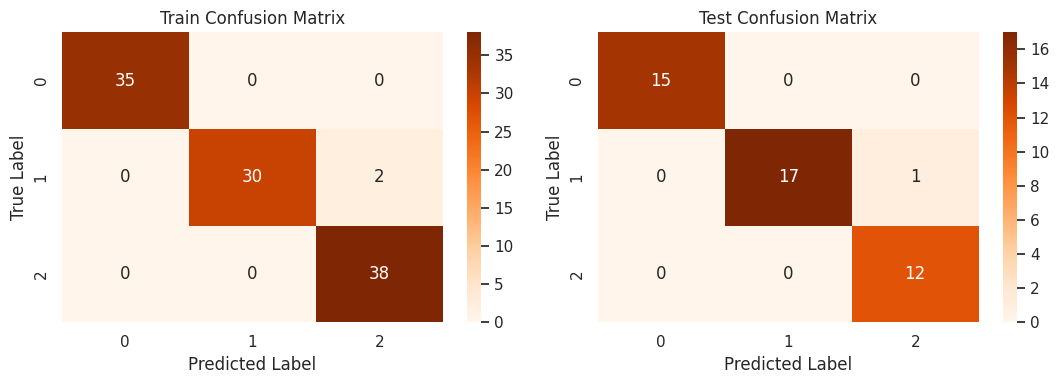

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(11,4))

print("\nConfusion Matrix:")
sns.heatmap(cm_train, annot=True, xticklabels=['0','1','2'], yticklabels=['0','1','2'], cmap="Oranges", fmt='.4g', ax=ax[0])
ax[0].set_xlabel("Predicted Label")
ax[0].set_ylabel("True Label")
ax[0].set_title("Train Confusion Matrix")

sns.heatmap(cm_test, annot=True, xticklabels=['0','1','2'], yticklabels=['0','1','2'], cmap="Oranges", fmt='.4g', ax=ax[1])
ax[1].set_xlabel("Predicted Label")
ax[1].set_ylabel("True Label")
ax[1].set_title("Test Confusion Matrix")

plt.tight_layout()
plt.show()


In [ ]:
# calculate classification report
cr_train = classification_report(y_train, y_pred_train, output_dict=True)
cr_test = classification_report(y_test, y_pred_test, output_dict=True)
print("\nTrain Classification Report:")
crt = pd.DataFrame(cr_train).T
print(crt.to_markdown())
# sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
print("\nTest Classification Report:")
crt2 = pd.DataFrame(cr_test).T
print(crt2.to_markdown())



Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    1        | 0.9375   |   0.967742 |  32        |
| 2            |    0.95     | 1        |   0.974359 |  38        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.983333 | 0.979167 |   0.9807   | 105        |
| weighted avg |    0.981905 | 0.980952 |   0.980889 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    1        | 0.944444 |   0.971429 | 18        |
| 2            |    0.923077 | 1        |   0.96     | 12        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

# Classification 2: Image data

Credits: Vineet

In [ ]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans

In [ ]:
digits = datasets.load_digits()
print(digits.keys())


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [ ]:
print(digits.data.shape)
print(digits.target.shape)
print(digits.images.shape)

(1797, 64)
(1797,)
(1797, 8, 8)


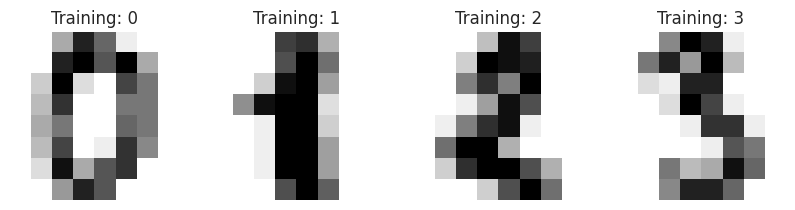

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [ ]:
# Split data into 80% train and 20% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, shuffle=False
)


In [ ]:

# Create a classifier: a support vector classifier
clf = LogisticRegression(penalty="l1", solver="saga", tol=0.1)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

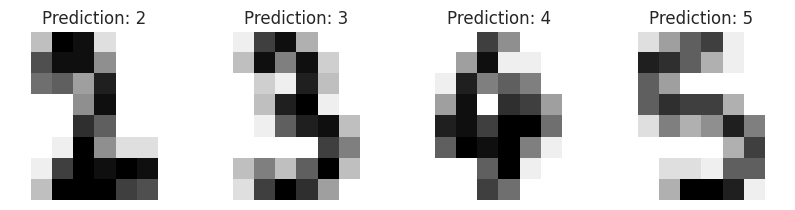

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [ ]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier LogisticRegression(penalty='l1', solver='saga', tol=0.1):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.85      0.78      0.81        36
           2       1.00      1.00      1.00        35
           3       0.90      0.70      0.79        37
           4       0.97      0.92      0.94        37
           5       0.84      1.00      0.91        37
           6       1.00      0.95      0.97        37
           7       0.92      0.97      0.95        36
           8       0.78      0.85      0.81        33
           9       0.78      0.86      0.82        37

    accuracy                           0.90       360
   macro avg       0.90      0.90      0.90       360
weighted avg       0.90      0.90      0.90       360




0.9


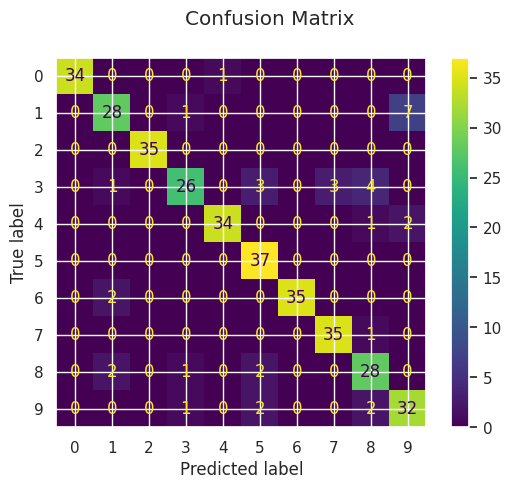

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(metrics.accuracy_score(y_test, predicted))
plt.show()


# Regression

Credits: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]



In [ ]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [ ]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))


Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


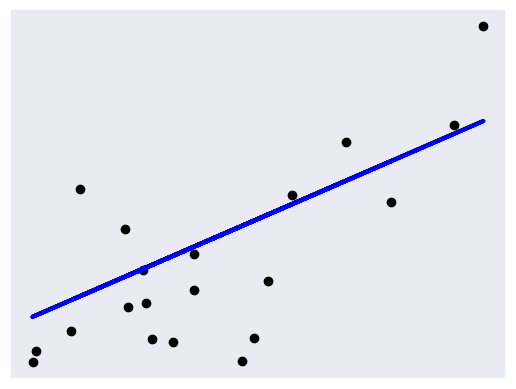

In [ ]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Blue line are the predictions and dots are the actual data points